In [2]:
import pandas as pd 

datos = pd.read_csv("flights.csv")
datos.shape

(71175, 11)

In [3]:
datos.head()

,flight_id,airline,aircraft_type,schengen,origin,arrival_time,departure_time,day,year,is_holiday,delay
0,26,MM,Airbus A320,non-schengen,TCY,8.885071,10.885071,0,2010,False,70.205981
1,10,YE,Airbus A320,non-schengen,TCY,8.939996,11.939996,0,2010,False,38.484609
2,3,BZ,Embraer E175,schengen,TZF,18.635384,22.635384,0,2010,False,2.388305
3,28,BZ,Airbus A330,non-schengen,EMM,15.967963,17.967963,0,2010,False,19.138491
4,15,BZ,Airbus A330,non-schengen,FJB,16.571894,19.571894,0,2010,False,15.016271


In [4]:
datos.tail()

,flight_id,airline,aircraft_type,schengen,origin,arrival_time,departure_time,day,year,is_holiday,delay
71170,3,BZ,Embraer E175,schengen,TZF,18.635384,22.635384,364,2022,True,25.677277
71171,17,BZ,Airbus A330,non-schengen,CNU,16.718722,21.718722,364,2022,True,52.624348
71172,7,MM,Boeing 787,schengen,TZF,8.564949,13.564949,364,2022,True,56.167080
71173,5,BZ,Airbus A320,schengen,ZQO,9.344097,12.344097,364,2022,True,56.758844
71174,29,BZ,Boeing 737,schengen,ZQO,8.591208,11.591208,364,2022,True,41.401648


In [5]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71175 entries, 0 to 71174
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   flight_id       71175 non-null  int64  
 1   airline         71175 non-null  object 
 2   aircraft_type   71175 non-null  object 
 3   schengen        71175 non-null  object 
 4   origin          71175 non-null  object 
 5   arrival_time    71175 non-null  float64
 6   departure_time  71175 non-null  float64
 7   day             71175 non-null  int64  
 8   year            71175 non-null  int64  
 9   is_holiday      71175 non-null  bool   
 10  delay           71175 non-null  float64
dtypes: bool(1), float64(3), int64(3), object(4)
memory usage: 5.5+ MB


In [6]:
datos.describe()

,flight_id,arrival_time,departure_time,day,year,delay
count,71175.000000,71175.000000,71175.000000,71175.000000,71175.000000,71175.000000
mean,15.465135,13.283159,16.480222,182.000000,2016.000000,12.548378
std,8.649646,4.023380,4.143705,105.366769,3.741684,23.125349
min,1.000000,7.065594,10.065594,0.000000,2010.000000,-41.028033
25%,8.000000,8.939996,12.668655,91.000000,2013.000000,-4.412876
50%,15.000000,14.258911,16.376052,182.000000,2016.000000,9.740454
75%,23.000000,16.909690,20.041281,273.000000,2019.000000,27.650853
max,30.000000,19.341235,23.341235,364.000000,2022.000000,125.632352


In [8]:
datos.describe(include="O")

,airline,aircraft_type,schengen,origin
count,71175,71175,71175,71175
unique,3,6,2,10
top,BZ,Airbus A320,schengen,TZF
freq,47598,30778,42569,14162


In [9]:
import seaborn as sns
import matplotlib.pyplot as plt


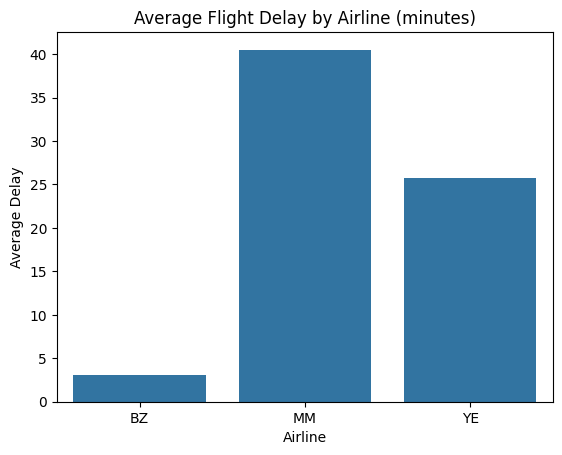

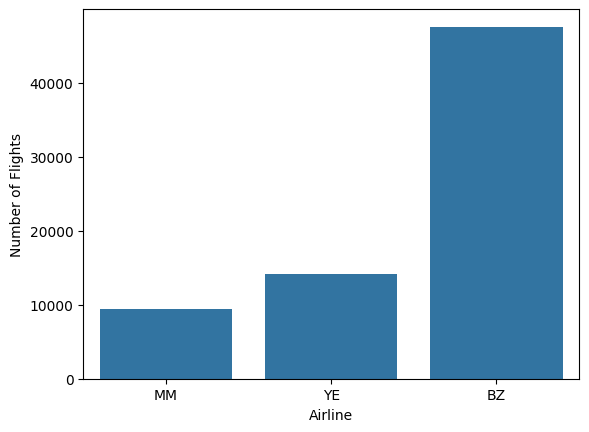

In [14]:
avg_delay = datos.groupby("airline")["delay"].mean().reset_index()
sns.barplot(x="airline", y="delay", data=avg_delay)
plt.xlabel("Airline")
plt.ylabel("Average Delay")
plt.title("Average Flight Delay by Airline (minutes)")
plt.show()

sns.countplot(data=datos, x="airline")
plt.xlabel("Airline")
plt.ylabel("Number of Flights")
plt.show()

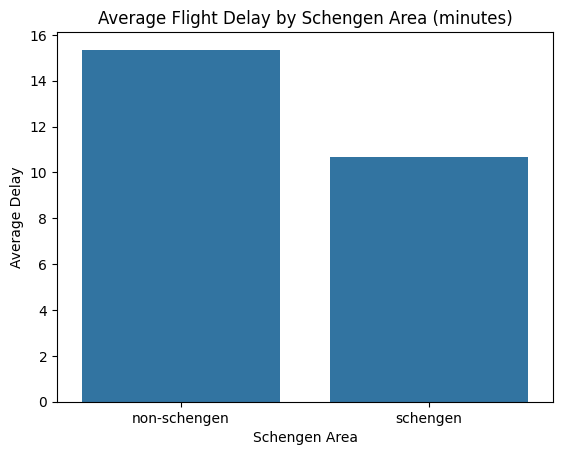

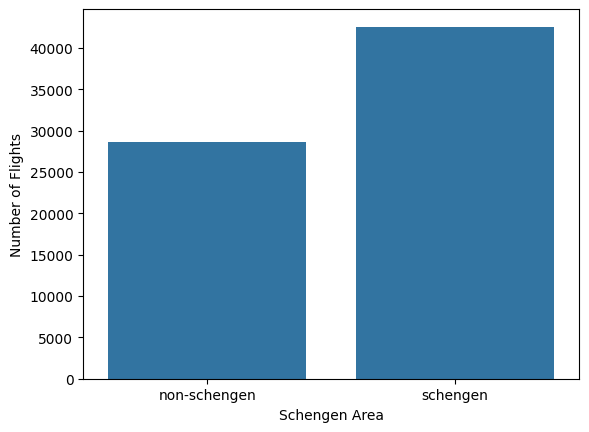

In [15]:
avg_delay = datos.groupby("schengen")["delay"].mean().reset_index()
sns.barplot(x="schengen", y="delay", data=avg_delay)
plt.xlabel("Schengen Area")
plt.ylabel("Average Delay")
plt.title("Average Flight Delay by Schengen Area (minutes)")
plt.show()

sns.countplot(data=datos, x="schengen")
plt.xlabel("Schengen Area")
plt.ylabel("Number of Flights")
plt.show()

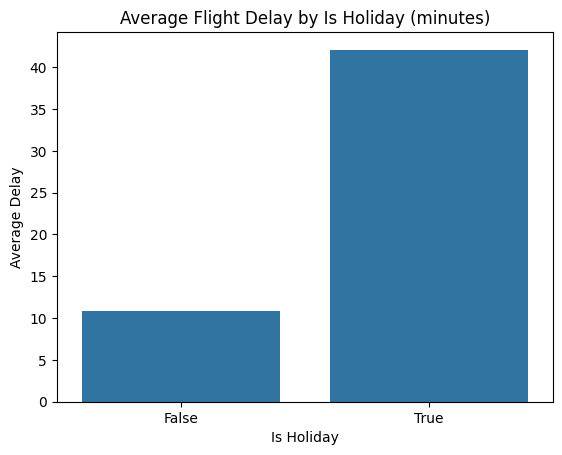

In [16]:
avg_delay = datos.groupby("is_holiday")["delay"].mean().reset_index()
sns.barplot(x="is_holiday", y="delay", data=avg_delay)
plt.xlabel("Is Holiday")
plt.ylabel("Average Delay")
plt.title("Average Flight Delay by Is Holiday (minutes)")
plt.show()

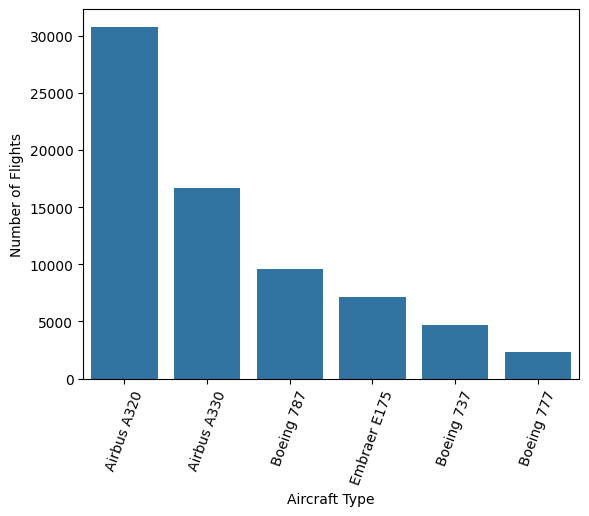

In [18]:
order = datos["aircraft_type"].value_counts().index
sns.countplot(data=datos, x="aircraft_type", order=order)
plt.xticks(rotation=70)
plt.xlabel("Aircraft Type")
plt.ylabel("Number of Flights")
plt.show()